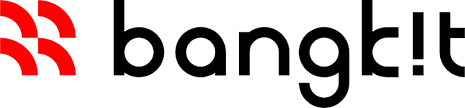

<hr style="margin-bottom: 40px;">

# BreatheAir : Monitoring Air Quality Project


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Packages

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
import tensorflow as tf
import numpy as np
%matplotlib inline

In [2]:
import keras
print(keras.__version__)
import sys
print(sys.version)
import tensorflow
print(tensorflow.__version__)

2.9.0
3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
2.9.0


### Utilities

In [3]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

### Prepare The Dataset

In [2]:
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
file_path = './dataset/pollution.csv'
dataset = pd.read_csv(file_path, parse_dates = [['year','month','day','hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.drop('cbwd', axis=1, inplace=True)
dataset.drop('Is', axis=1, inplace=True)
dataset.drop('Ir', axis=1, inplace=True)
# Manually Specify Column Names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_spd']
dataset.index.name = 'date'
# Mark All NA Values from No. 0-24 with 0
dataset['pollution'].fillna(0, inplace=True)
# Drop No. 0-24
dataset = dataset[24:]
# Summarize
print(dataset.head(5))

                     pollution  dew  temp   press  wnd_spd
date                                                      
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0     1.79
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0     2.68
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0     3.57
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0     5.36
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0     6.25


In [9]:
# Save data into csv file
dataset.to_csv('fixed_pollution_dataset.csv')

##### Visualize Dataset

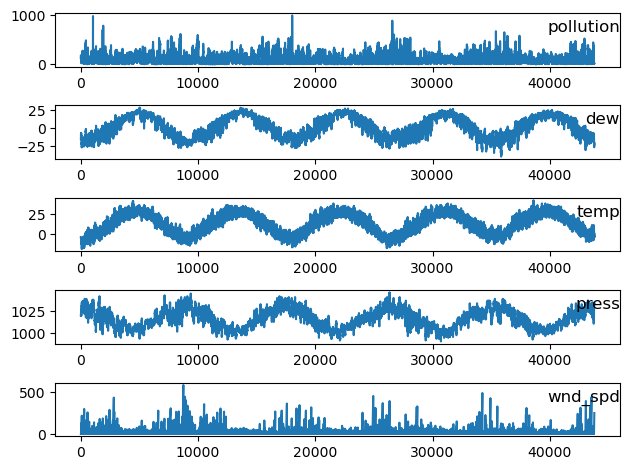

In [4]:
# Load dataset
dataset = pd.read_csv('fixed_pollution_dataset.csv', header=0, index_col=0)
values = dataset.values
# Specify columns to plot
groups = [0,1,2,3,4]
i = 1
# Plot each columns
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.tight_layout()
pyplot.show()

In [5]:
dataset.index = pd.to_datetime(dataset.index)

In [6]:
print(dataset.index.dtype)

datetime64[ns]


In [7]:
dataset.head()

,pollution,dew,temp,press,wnd_spd
date,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25


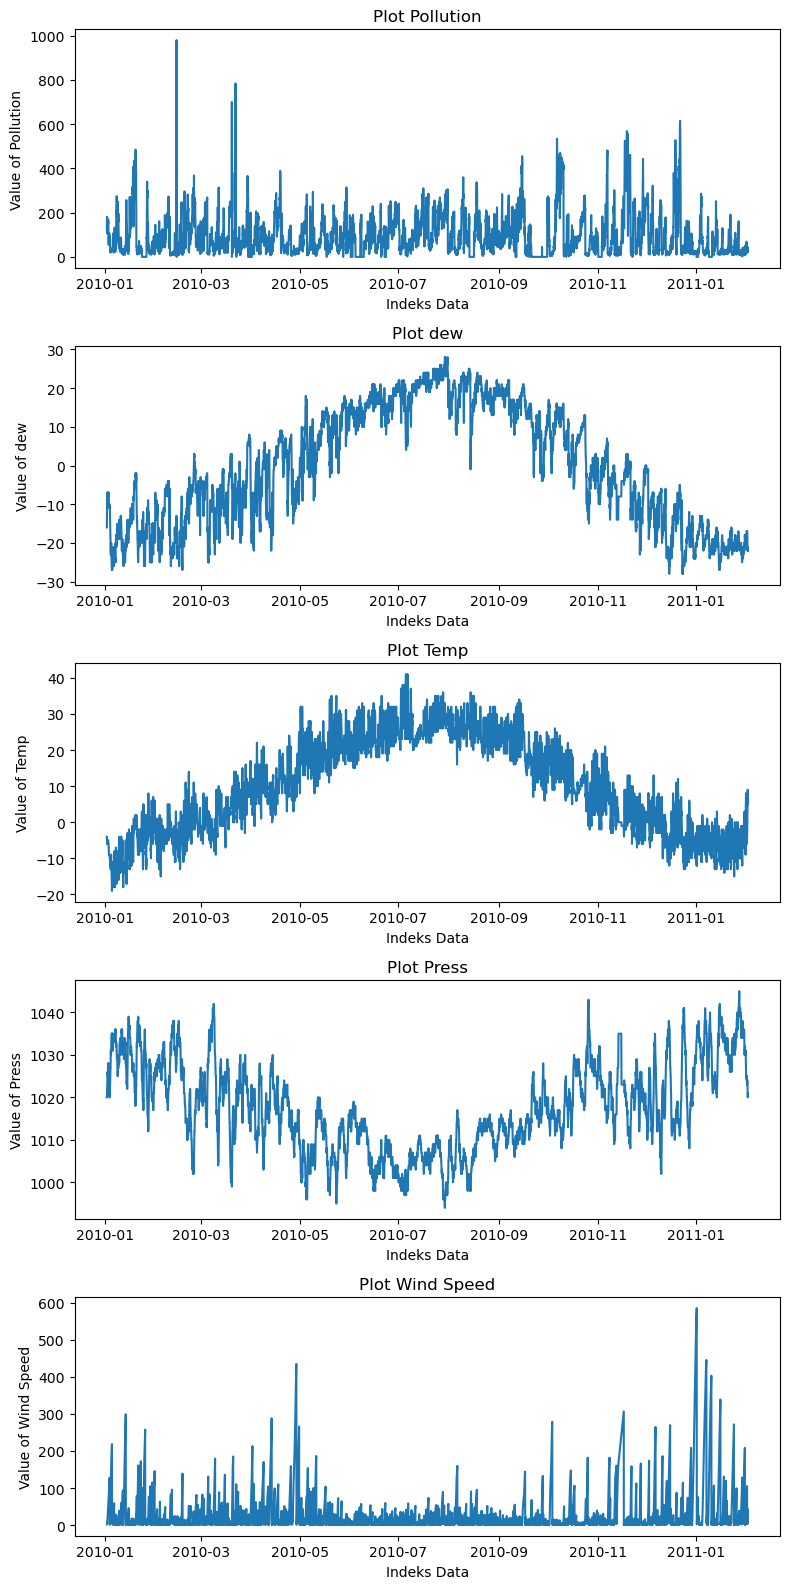

In [8]:
# Plot kolom 'temp' dengan rentang nilai 0-10000
pollution = dataset['pollution']
dew = dataset['dew']
temp = dataset['temp']
press = dataset['press']
wnd_spd = dataset['wnd_spd']
fig, axs = plt.subplots(5, 1, figsize=(8,16))

# Plot Pollution
axs[0].plot(pollution[0:9500])
axs[0].set_xlabel('Indeks Data')
axs[0].set_ylabel('Value of Pollution')
axs[0].set_title('Plot Pollution')

# Plot dew
axs[1].plot(dew[0:9500])
axs[1].set_xlabel('Indeks Data')
axs[1].set_ylabel('Value of dew')
axs[1].set_title('Plot dew')

# Plot temp
axs[2].plot(temp[0:9500])
axs[2].set_xlabel('Indeks Data')
axs[2].set_ylabel('Value of Temp')
axs[2].set_title('Plot Temp')

# Plot press
axs[3].plot(press[0:9500])
axs[3].set_xlabel('Indeks Data')
axs[3].set_ylabel('Value of Press')
axs[3].set_title('Plot Press')

# Plot wnd_spd
axs[4].plot(wnd_spd[0:9500])
axs[4].set_xlabel('Indeks Data')
axs[4].set_ylabel('Value of Wind Speed')
axs[4].set_title('Plot Wind Speed')

plt.tight_layout()
plt.show()


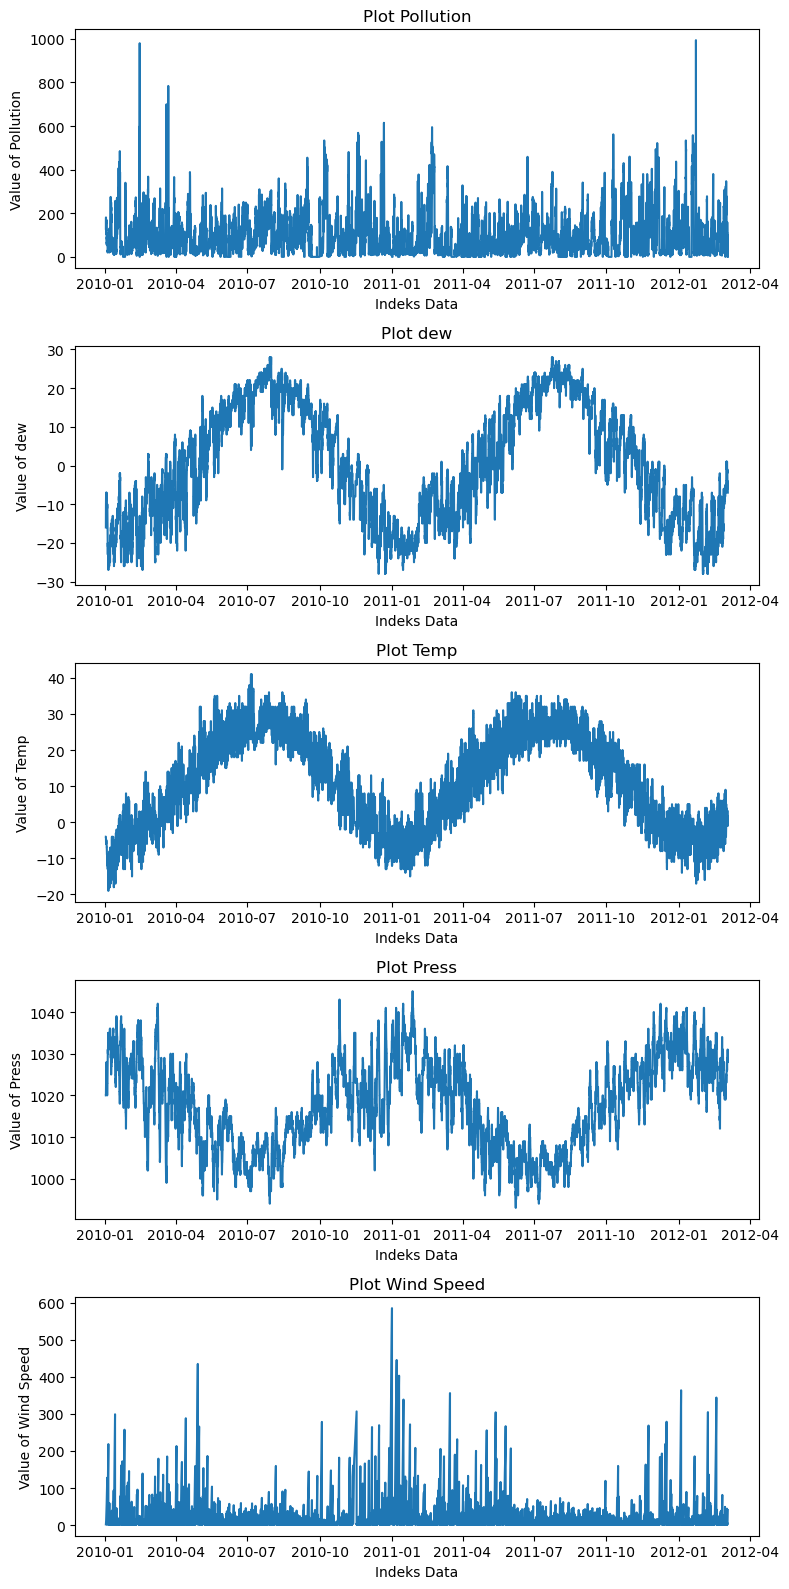

In [9]:
# Plot kolom 'temp' dengan rentang nilai 0-10000
pollution = dataset['pollution']
dew = dataset['dew']
temp = dataset['temp']
press = dataset['press']
wnd_spd = dataset['wnd_spd']
fig, axs = plt.subplots(5, 1, figsize=(8,16))

# Plot Pollution
axs[0].plot(pollution[0:19000])
axs[0].set_xlabel('Indeks Data')
axs[0].set_ylabel('Value of Pollution')
axs[0].set_title('Plot Pollution')

# Plot dew
axs[1].plot(dew[0:19000])
axs[1].set_xlabel('Indeks Data')
axs[1].set_ylabel('Value of dew')
axs[1].set_title('Plot dew')

# Plot temp
axs[2].plot(temp[0:19000])
axs[2].set_xlabel('Indeks Data')
axs[2].set_ylabel('Value of Temp')
axs[2].set_title('Plot Temp')

# Plot press
axs[3].plot(press[0:19000])
axs[3].set_xlabel('Indeks Data')
axs[3].set_ylabel('Value of Press')
axs[3].set_title('Plot Press')

# Plot wnd_spd
axs[4].plot(wnd_spd[0:19000])
axs[4].set_xlabel('Indeks Data')
axs[4].set_ylabel('Value of Wind Speed')
axs[4].set_title('Plot Wind Speed')

plt.tight_layout()
plt.show()


Note: Dikarenakan trend yang terlihat pola nya ada pada tahunan maka saya menggunakan window size nya sebesar 9500.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Build The Model

### Preprocessing Dataset 

##### Convert Series to Supervised Learning

In [8]:
# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [9]:
# Load Dataset
dataset = pd.read_csv('fixed_pollution_dataset.csv', header=0, index_col=0)
values = dataset.values
# Ensure all data is float
values = values.astype('float32')
# Normalize Features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 5
# Frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# drop columns we don't want to predict
# n_vars = 4
# reframed.drop(reframed.columns[[-(n_vars+1-i) for i in range(1, n_vars+1)]], axis=1, inplace=True)
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  \
3   0.129779   0.352941   0.245902   0.527273   0.002290   0.148893   
4   0.148893   0.367647   0.245902   0.527273   0.003811   0.159960   
5   0.159960   0.426471   0.229508   0.545454   0.005332   0.182093   
6   0.182093   0.485294   0.229508   0.563637   0.008391   0.138833   
7   0.138833   0.485294   0.229508   0.563637   0.009912   0.109658   

   var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var1(t-1)  var2(t-1)  \
3   0.367647   0.245902   0.527273   0.003811   0.159960   0.426471   
4   0.426471   0.229508   0.545454   0.005332   0.182093   0.485294   
5   0.485294   0.229508   0.563637   0.008391   0.138833   0.485294   
6   0.485294   0.229508   0.563637   0.009912   0.109658   0.485294   
7   0.485294   0.213115   0.563637   0.011433   0.105634   0.485294   

   var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  \
3   0.229508   0.545454   0.005332  0.182093  0.485294  0.229508  0.

##### Split into Train and Test set

- Train Set : 4 Year
- Test Set : 1 Year

In [10]:
# Split into train and test set
values = reframed.values
n_train_hours = (365 * 4) * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# Split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 15) 35040 (35040,)
(35040, 3, 5) (35040,) (8757, 3, 5) (8757,)


In [12]:
test_X.shape

(8757, 3, 5)

In [17]:
test_X

array([[[2.4144869e-02, 2.9411766e-01, 4.2622948e-01, 4.1818237e-01,
         2.4443306e-01],
        [5.3319916e-02, 2.9411766e-01, 4.2622948e-01, 3.9999962e-01,
         2.5130311e-01],
        [6.5392353e-02, 2.9411766e-01, 4.0983605e-01, 3.9999962e-01,
         2.5817317e-01]],

       [[5.3319916e-02, 2.9411766e-01, 4.2622948e-01, 3.9999962e-01,
         2.5130311e-01],
        [6.5392353e-02, 2.9411766e-01, 4.0983605e-01, 3.9999962e-01,
         2.5817317e-01],
        [7.0422530e-02, 2.9411766e-01, 4.0983605e-01, 3.9999962e-01,
         2.6123220e-01]],

       [[6.5392353e-02, 2.9411766e-01, 4.0983605e-01, 3.9999962e-01,
         2.5817317e-01],
        [7.0422530e-02, 2.9411766e-01, 4.0983605e-01, 3.9999962e-01,
         2.6123220e-01],
        [7.9476856e-02, 3.2352942e-01, 3.6065573e-01, 3.8181877e-01,
         7.5194397e-04]],

       ...,

       [[1.0060362e-02, 2.6470590e-01, 2.7868852e-01, 7.6363754e-01,
         3.8573021e-01],
        [8.0482895e-03, 2.5000003e-01, 2.

### Build Neural Network

In [13]:
# Design Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=50, kernel_size=3, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)])
 # Print the model summary 
model.summary()

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 50)             800       
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 21,051
Trainable params: 21,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
487/487 - 9s - loss: 0.0251 - val_loss: 0.0144 - 9s/epoch - 19ms/step
Epoch 2/50
487/487 - 3s - loss: 0.0162 - val_loss: 0.0134 - 3s/epoch - 6ms/step
Epoch 3/50
487/487 - 3s

In [18]:
# Get initial weights
init_weights = model.get_weights()

In [19]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

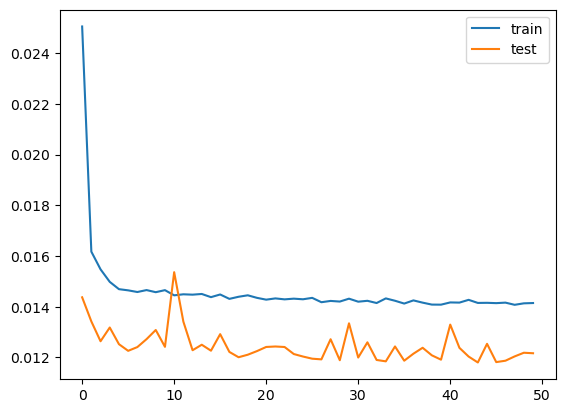

In [20]:
# Plot Loss History
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Evaluation Model

In [21]:
# make a prediction
yhat = model.predict(test_X)

274/274 [==============================] - 2s 2ms/step


In [22]:
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

In [23]:
yhat.shape

(8757, 1)

In [24]:
test_X[:, -4:].shape

(8757, 4)

In [25]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [26]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [27]:
data_predict = pd.DataFrame(inv_yhat, columns={'Data Predict': 'Data Predict'})

In [28]:
data_actual = pd.DataFrame(inv_y, columns={'Data Actual': 'Data Actual'})

In [29]:
df_concat = pd.concat([data_predict.rename(columns={'Data Predict': 'Data Predict'}),
                      data_actual.rename(columns={'Data Actual': 'Data Actual'})], axis=1)


In [30]:
df_concat

,Data Predict,Data Actual
0,64.337143,70.0
1,67.273933,79.0
2,88.463387,92.0
3,100.964355,106.0
4,106.280014,75.0
...,...,...
8752,15.545984,8.0
8753,14.028179,10.0
8754,16.082399,10.0
8755,16.216061,8.0


In [31]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 23.321


In [32]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(inv_y, inv_yhat).numpy())
print(tf.keras.metrics.mean_absolute_error(inv_y, inv_yhat).numpy())

543.8639
12.094267


In [33]:
no = np.arange(8757)

In [67]:
# Load Dataset
dataset = pd.read_csv('fixed_pollution_dataset.csv')
# Separate dates for future plotting
train_dates = pd.to_datetime(dataset['date'])

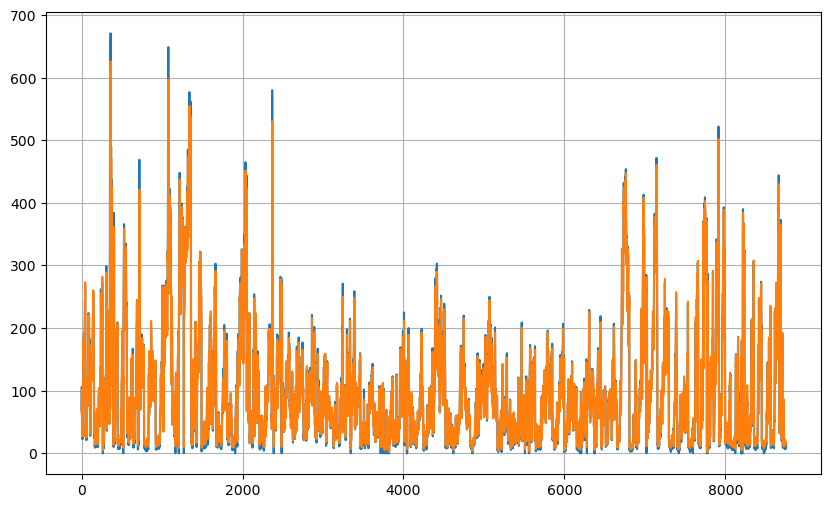

In [27]:
plot_series(no, (inv_y, inv_yhat))

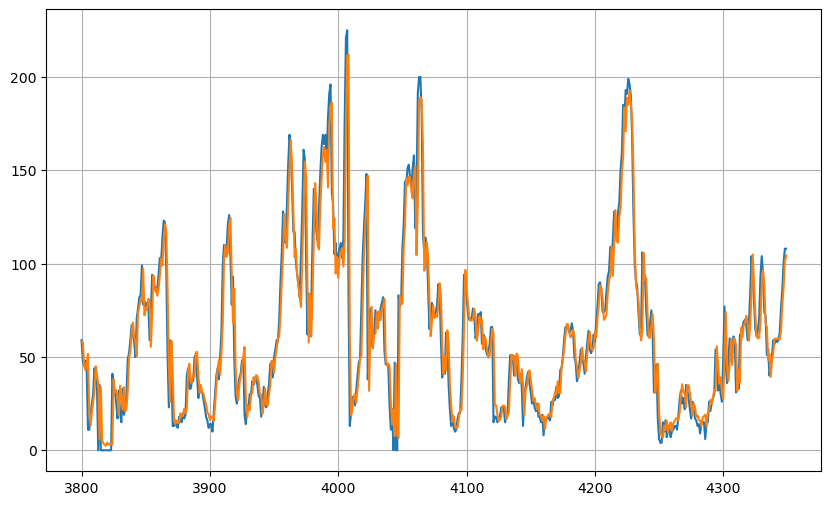

In [28]:
plot_series(no, (inv_y, inv_yhat), start=3800, end=4350)

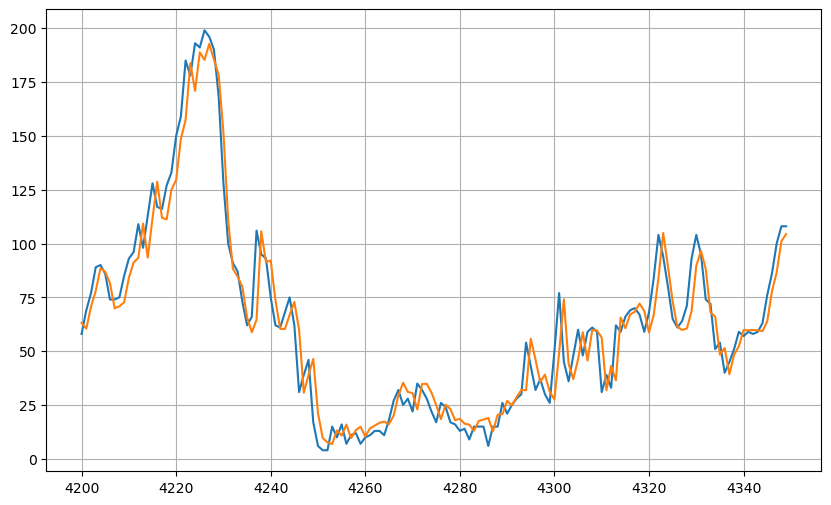

In [29]:
plot_series(no, (inv_y, inv_yhat), start=4200, end=4350)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Save Model

In [43]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

### Import H5 Model to JSON

In [44]:
import tensorflow as tf
import tensorflowjs as tfjs

# Tentukan path model .h5
model_h5_path = "./1684935094.h5"

# Muat model .h5
model = tf.keras.models.load_model(model_h5_path)

# Tentukan direktori tujuan untuk model yang dikonversi
output_dir = "./model"

# Konversi model dari format .h5 ke JSON
tfjs.converters.save_keras_model(model, output_dir)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Model Classification

#### Prepare Dataset

In [ ]:
# 1. Persiapan Data
# Load dataset
# Misalkan Anda memiliki data dalam format CSV, lakukan proses baca dataset ke dalam pandas DataFrame
data_clf = pd.read_csv('Pollution_dataset.csv')

# Pisahkan fitur input dan target output
X = data_clf[['pollution', 'dew', 'temp', 'press', 'wnd_spd']]
y = data_clf['categori']


#### Preprocessing Dataset

In [ ]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
X_test

#### Build The Model

In [ ]:
model_clf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_clf.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

#### Evaluation Model

In [ ]:
# 3. Evaluasi Model
y_pred = model_clf.predict(X_test)

In [ ]:
X_test.shape

In [ ]:
y_pred

In [ ]:
y_pred_labels = y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_test, y_pred_labels))

In [ ]:
y_pred_labels
y_test = np.array(y_test)
y_test

In [ ]:
class_predict = pd.DataFrame(y_pred_labels, columns={'Data Predict': 'Data Predict'})
class_actual = pd.DataFrame(y_test, columns={'Data Actual': 'Data Actual'})
df_concat = pd.concat([class_predict.rename(columns={'Data Predict': 'Data Predict'}),
                      class_actual.rename(columns={'Data Actual': 'Data Actual'})], axis=1)
df_concat

### Test The Model

In [ ]:
data_test = {'pollution': [48],
             'dew': [-11],
             'temp': [-8],
             'press': [1030],
             'wnd_spd': [14.3]}
data_test = pd.DataFrame(data_test)
data_test = np.array(data_test)

In [ ]:
data_test

In [ ]:
nyoba = model_clf.predict(data_test)

In [ ]:
nyoba_labels =  nyoba.argmax(axis=1)

In [ ]:
nyoba_labels